In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("KDDTest+.csv")

In [3]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,private,REJ,0,0,0,0,0,0,...,10,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,anomaly
1,0,tcp,private,REJ,0,0,0,0,0,0,...,1,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,anomaly
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,86,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,57,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,anomaly
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,86,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,anomaly


In [4]:
df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [5]:
df.duplicated().sum()

3

In [6]:
df[df.duplicated()]

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
10256,0,tcp,other,REJ,0,0,0,0,0,0,...,1,0.0,1.0,0.0,0.0,0.07,0.0,0.93,1.0,anomaly
10619,0,tcp,other,REJ,0,0,0,0,0,0,...,1,0.0,1.0,0.0,0.0,0.03,0.0,0.97,1.0,anomaly
15044,0,tcp,other,REJ,0,0,0,0,0,0,...,1,0.0,1.0,0.0,0.0,0.02,0.0,0.98,1.0,anomaly


In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22541 entries, 0 to 22543
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     22541 non-null  int64  
 1   protocol_type                22541 non-null  object 
 2   service                      22541 non-null  object 
 3   flag                         22541 non-null  object 
 4   src_bytes                    22541 non-null  int64  
 5   dst_bytes                    22541 non-null  int64  
 6   land                         22541 non-null  int64  
 7   wrong_fragment               22541 non-null  int64  
 8   urgent                       22541 non-null  int64  
 9   hot                          22541 non-null  int64  
 10  num_failed_logins            22541 non-null  int64  
 11  logged_in                    22541 non-null  int64  
 12  num_compromised              22541 non-null  int64  
 13  root_shell      

In [9]:
df.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,22541.000000,2.254100e+04,2.254100e+04,22541.000000,22541.000000,22541.000000,22541.000000,22541.000000,22541.000000,22541.000000,...,22541.000000,22541.000000,22541.000000,22541.000000,22541.000000,22541.000000,22541.000000,22541.000000,22541.000000,22541.000000
mean,218.888204,1.039683e+04,2.056292e+03,0.000311,0.008429,0.000710,0.105408,0.021649,0.442261,0.119915,...,193.861275,140.769132,0.608803,0.090419,0.132279,0.019641,0.097821,0.099439,0.233288,0.226580
std,1407.267989,4.728179e+05,2.122070e+04,0.017620,0.142608,0.036476,0.928489,0.150338,0.496666,7.270081,...,94.039276,111.779783,0.435661,0.220482,0.306285,0.085399,0.273156,0.281883,0.387164,0.400802
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,121.000000,15.000000,0.070000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,5.400000e+01,4.600000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,168.000000,0.920000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.870000e+02,6.010000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.060000,0.030000,0.010000,0.000000,0.000000,0.360000,0.170000
max,57715.000000,6.282565e+07,1.345927e+06,1.000000,3.000000,3.000000,101.000000,4.000000,1.000000,796.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


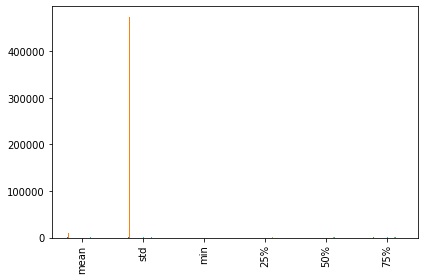

In [10]:
df.describe().iloc[1:-1, :].plot.bar(legend=False)
plt.tight_layout()
plt.show()

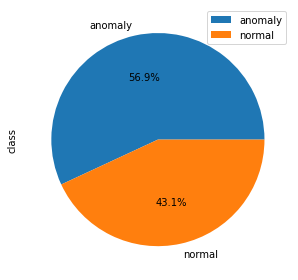

In [12]:
df["class"].value_counts().plot.pie(autopct="%.1f%%", labels=df["class"].unique(), legend=True)
plt.tight_layout()
plt.show()

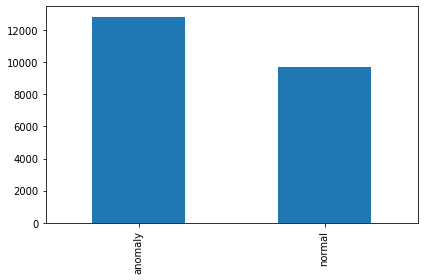

In [14]:
df["class"].value_counts().plot.bar()
plt.tight_layout()
plt.show()

In [15]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for i in df.columns:
    if df[i].dtypes.name == "object":
        df[i] = le.fit_transform(df[i])
    

In [16]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,1,45,1,0,0,0,0,0,0,...,10,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,0
1,0,1,45,1,0,0,0,0,0,0,...,1,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,0
2,2,1,19,9,12983,0,0,0,0,0,...,86,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,1
3,0,0,13,9,20,0,0,0,0,0,...,57,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,0
4,1,1,55,2,0,15,0,0,0,0,...,86,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,0


/tmp/ipykernel_33717/2581739955.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(bins=10, ax=ax)


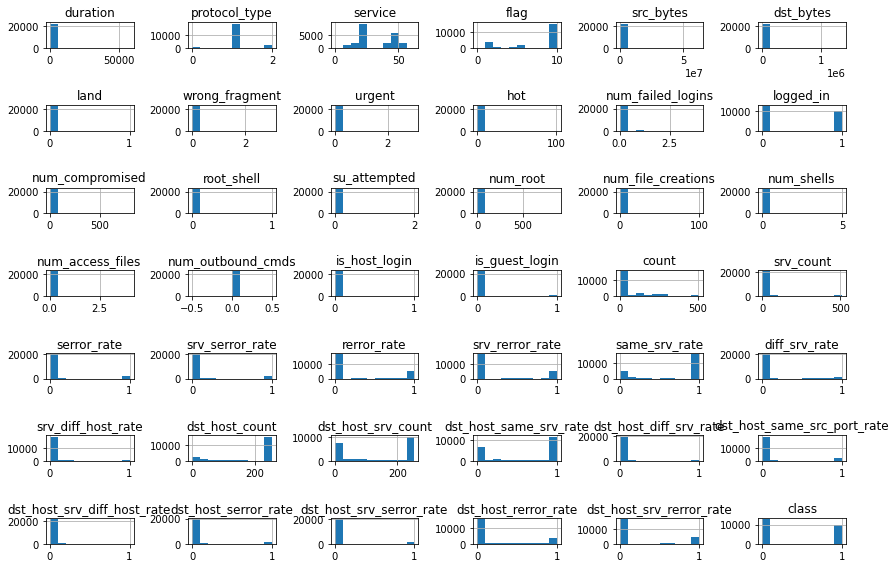

In [20]:
fig, ax = plt.subplots(figsize=(12, 8))
df.hist(bins=10, ax=ax)
plt.tight_layout()
plt.show()

/tmp/ipykernel_33717/3195219918.py:12: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  plt.tight_layout()


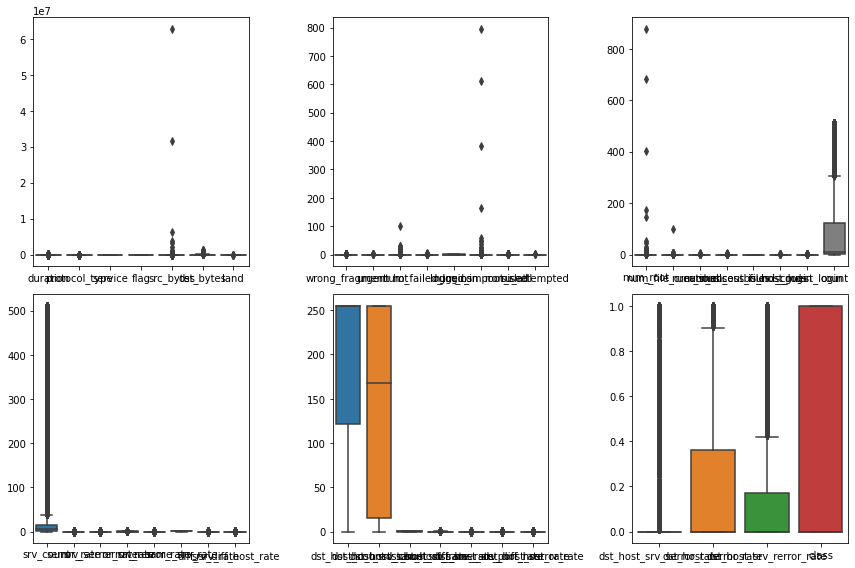

In [21]:
import seaborn as sns
fig, ax = plt.subplots(2, 3, figsize=(12, 8), layout="constrained")

sns.boxplot(data=df.iloc[:, :7], ax=ax[0][0])
sns.boxplot(data=df.iloc[:, 7:15], ax=ax[0][1])
sns.boxplot(data=df.iloc[:, 15:23], ax=ax[0][2])

sns.boxplot(data=df.iloc[:, 23:31], ax=ax[1][0])
sns.boxplot(data=df.iloc[:, 31:38], ax=ax[1][1])
sns.boxplot(data=df.iloc[:, 38:], ax=ax[1][2])

plt.tight_layout()
plt.show()

/tmp/ipykernel_33717/4289272554.py:11: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  plt.tight_layout()


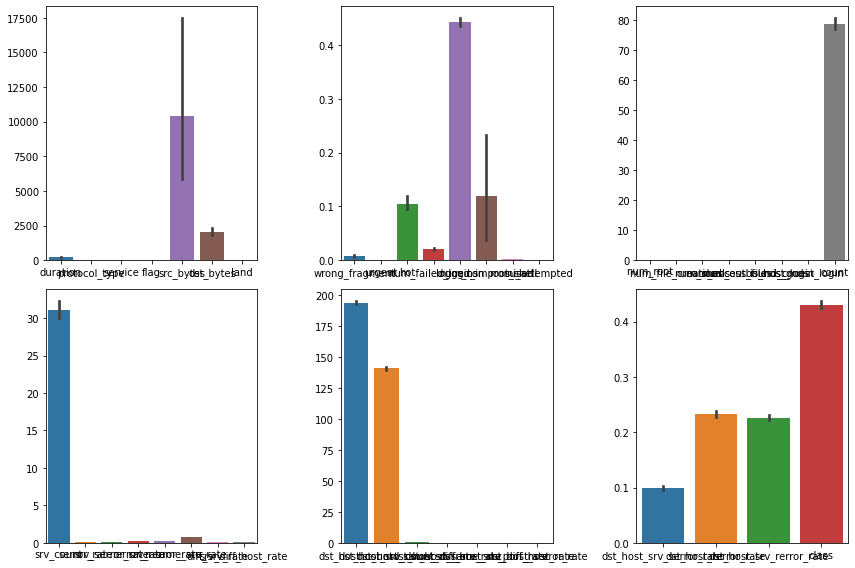

In [22]:
fig, ax = plt.subplots(2, 3, figsize=(12, 8), layout="constrained")

sns.barplot(data=df.iloc[:, :7], ax=ax[0][0])
sns.barplot(data=df.iloc[:, 7:15], ax=ax[0][1])
sns.barplot(data=df.iloc[:, 15:23], ax=ax[0][2])

sns.barplot(data=df.iloc[:, 23:31], ax=ax[1][0])
sns.barplot(data=df.iloc[:, 31:38], ax=ax[1][1])
sns.barplot(data=df.iloc[:, 38:], ax=ax[1][2])

plt.tight_layout()
plt.show()

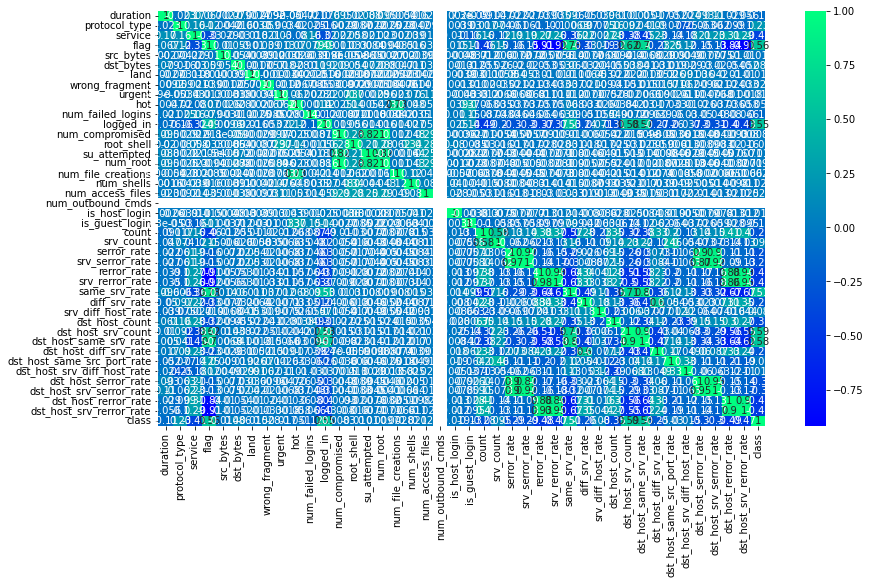

In [23]:
fig, ax = plt.subplots(figsize=(12, 8), layout="constrained")
sns.heatmap(df.corr(), annot=True, cmap="winter", ax=ax)
plt.show()

In [25]:
df["num_outbound_cmds"].unique()

array([0])

In [26]:
df.drop(columns=["num_outbound_cmds"], inplace=True)

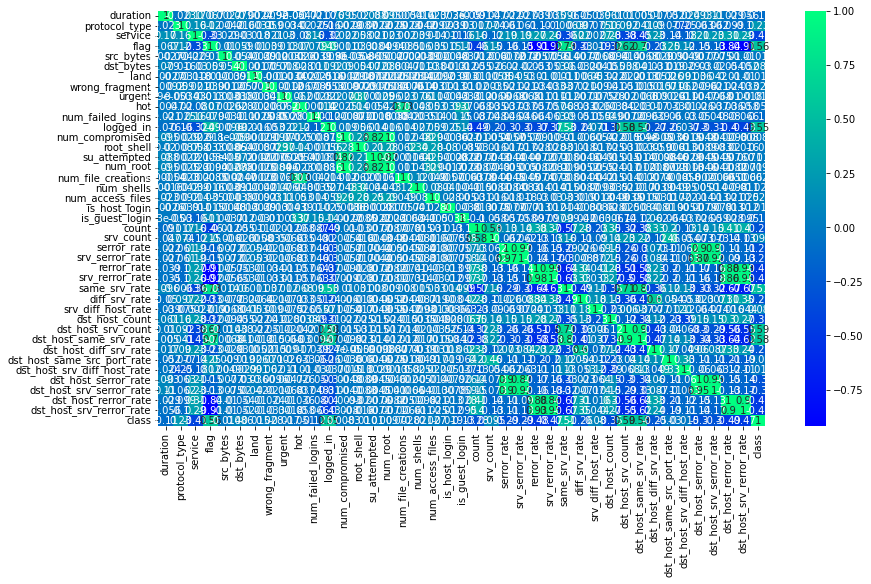

In [27]:
fig, ax = plt.subplots(figsize=(12, 8), layout="constrained")
sns.heatmap(df.corr(), annot=True, cmap="winter", ax=ax)
plt.show()

In [28]:
df.shape

(22541, 41)

In [29]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,1,45,1,0,0,0,0,0,0,...,10,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,0
1,0,1,45,1,0,0,0,0,0,0,...,1,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,0
2,2,1,19,9,12983,0,0,0,0,0,...,86,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,1
3,0,0,13,9,20,0,0,0,0,0,...,57,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,0
4,1,1,55,2,0,15,0,0,0,0,...,86,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,0


In [30]:
df2 = pd.read_csv("KDDTest+.csv")
for i in df2.columns:
    if df2[i].dtypes.name == "object":
        le.fit(df2[i])
        df[i] = le.inverse_transform(df[i])

In [31]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,private,REJ,0,0,0,0,0,0,...,10,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,anomaly
1,0,tcp,private,REJ,0,0,0,0,0,0,...,1,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,anomaly
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,86,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,57,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,anomaly
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,86,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,anomaly


In [32]:
df.to_csv("KDDTest.csv")